In [1]:
# import all necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resize Image

To read more about resizing image uing cv2 visit [link](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/)

In [14]:
# Load the image
image = cv2.imread(filename = "data/2dogs.jpeg") # BGR image
print(f"original (height, width, channels) : {image.shape}")

# resize the image for given width and height
new_width = 150
new_height = 100

resized = cv2.resize(image, (new_width, new_height), interpolation= cv2.INTER_LINEAR)
print(f"Resized (height, width, channels) : {resized.shape}")

original (height, width, channels) : (194, 259, 3)
Resized (height, width, channels) : (100, 150, 3)


(<AxesSubplot:title={'center':'Resized'}>,
 (-0.5, 149.5, 99.5, -0.5),
 Text(0.5, 1.0, 'Resized'))

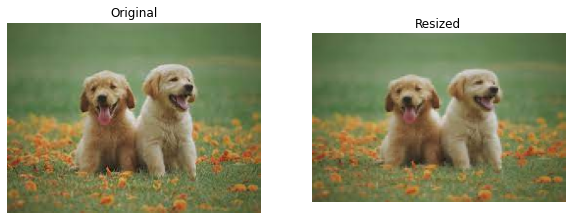

In [30]:
# display original and resized image
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(image[:, :, ::-1]), plt.axis('off'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(resized[:, :, ::-1]), plt.axis('off'), plt.title("Resized")

# Crop the image

(<matplotlib.image.AxesImage at 0x15432c730>, (-0.5, 64.5, 99.5, -0.5))

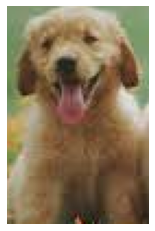

In [20]:
# Load the image
image = cv2.imread(filename = "data/2dogs.jpeg") # BGR image

# crop/slice image exactly like slicing array from numpy array
# across height 50 -> 150
# across width 70 -> 135
crop = image[50:150, 70:135]

# display crop
plt.imshow(crop[:, :, ::-1]), plt.axis('off')


# Convert image to grayscale

### Method 1 : Read the image as grayscale image

(<matplotlib.image.AxesImage at 0x154d14ca0>, (-0.5, 258.5, 193.5, -0.5))

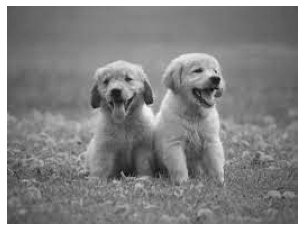

In [28]:
# Load the image
image = cv2.imread("data/2dogs.jpeg", cv2.IMREAD_GRAYSCALE)
# image = cv2.imread("data/2dogs.jpeg", 0)


# display image
plt.imshow(image, cmap = 'gray'), plt.axis('off')

### Method 2 : convert BGR image to grayscale image

(<matplotlib.image.AxesImage at 0x154d47be0>, (-0.5, 258.5, 193.5, -0.5))

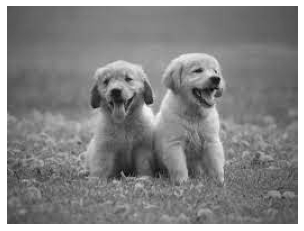

In [29]:
# Load the image
image = cv2.imread("data/2dogs.jpeg") # BGR image

# convert BGR -> gray
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# display image
plt.imshow(gray, cmap = 'gray'), plt.axis('off')

# Rotate Image

cv2 doesn't have any direct method to rotate the image about any corner or the center.   
So to rotate the image couple of steps needed to be followed:  
- step 1: get the point at which image needs to be rotated (e.g., center of the image)
- step 2: get the rotation matrix using **cv2.getRotationMatrix2D(center, angle, scale)** function
- step 3: rotate the image matrix using **cv2.warpAffine(src, M, dsize)** function


(<matplotlib.image.AxesImage at 0x154d7d8b0>, (-0.5, 258.5, 193.5, -0.5))

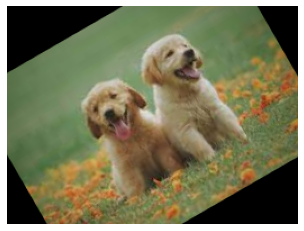

In [32]:
# Load the image
image = cv2.imread("data/2dogs.jpeg")

height, width, _ = image.shape

# get the center of the image
center = (width//2, height//2) # to insure integer value

# get the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center=center, angle=30, scale=1)

# rotate the image
rotated = cv2.warpAffine(src=image, M=rotation_matrix, dsize=(width, height))

plt.imshow(rotated[:, :, ::-1]), plt.axis('off')



### Method 2 for rotating images
In above method, it can be seen that while rotating, some part of the image is lost  
So, to correctly rotate the image, **rotate_bound** function from **imutils** package can be used. 

If **imutils** package is not installed, do  
`pip install imutils`


In [ ]:
#!pip install imutils

In [35]:
import imutils

**imutils** have two rotate functions. 
1. `rotate`: rotate the image similar to cv2
2. `rotate_bound`: rotate image such that no part of the image is lost.  

to understand mathematics, follow [link](https://pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/)

(<AxesSubplot:title={'center':'rotated correctly'}>,
 (-0.5, 320.5, 296.5, -0.5),
 Text(0.5, 1.0, 'rotated correctly'))

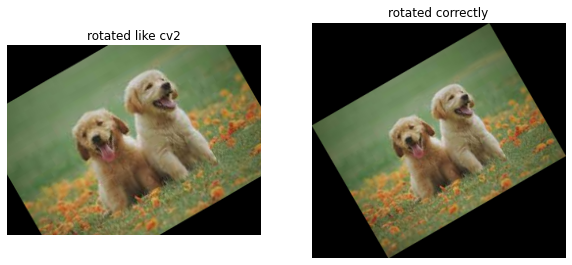

In [39]:
# Load the image
image = cv2.imread("data/2dogs.jpeg")

# rotate the image similar to cv2
rotated1 = imutils.rotate(image, 30)

# rotate the image correctly
rotated2 = imutils.rotate_bound(image, -30)

# display both rotated images
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(rotated1[:, :, ::-1]), plt.axis('off'), plt.title("rotated like cv2")
plt.subplot(1, 2, 2), plt.imshow(rotated2[:, :, ::-1]), plt.axis('off'), plt.title("rotated correctly")

# Thresholding [link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

### 1. Binary Thresholding

**Binary Threshold Rule**

`if image(x,y) > thresh -> dst(x,y) = max_value `  
`else -> dst(x,y) = 0   `



(<AxesSubplot:title={'center':'Thresholded'}>,
 (-0.5, 3263.5, 2447.5, -0.5),
 Text(0.5, 1.0, 'Thresholded'))

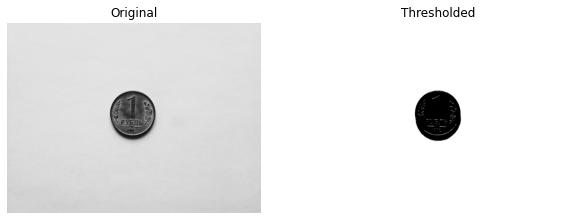

In [77]:
# Load the image
image = cv2.imread("data/coin.jpeg", cv2.IMREAD_GRAYSCALE)

# Set threshold and max_val
thresh = 180
max_value = 255

# threshold image
th, dst = cv2.threshold(image, thresh, max_value, cv2.THRESH_BINARY)

# display both rotated images
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap = 'gray'), plt.axis('off'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(dst, cmap = 'gray'), plt.axis('off'), plt.title("Thresholded")

### 2. Inverse-Binary Thresholding

**Inverse-Binary Threshold Rule**

`if image(x,y) > thresh -> dst(x,y) = 0 `  
`else -> dst(x,y) = max_value `



(<AxesSubplot:title={'center':'Thresholded'}>,
 (-0.5, 3263.5, 2447.5, -0.5),
 Text(0.5, 1.0, 'Thresholded'))

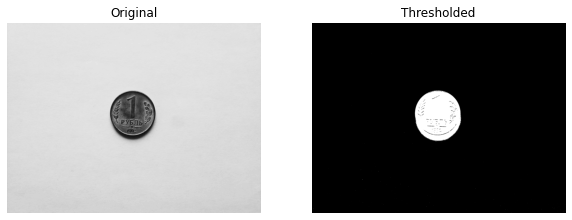

In [78]:
# Load the image
image = cv2.imread("data/coin.jpeg", cv2.IMREAD_GRAYSCALE)

# Set threshold and max_val
thresh = 180
max_value = 255

# threshold image
th, dst = cv2.threshold(image, thresh, max_value, cv2.THRESH_BINARY_INV)

# display both rotated images
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap = 'gray'), plt.axis('off'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(dst, cmap = 'gray'), plt.axis('off'), plt.title("Thresholded")

# Edge Detection [link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

(<AxesSubplot:title={'center':'Edged'}>,
 (-0.5, 258.5, 193.5, -0.5),
 Text(0.5, 1.0, 'Edged'))

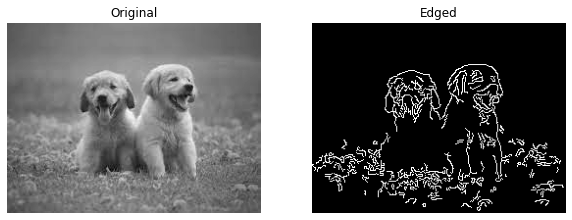

In [86]:
# Load the image
image = cv2.imread("data/2dogs.jpeg", cv2.IMREAD_GRAYSCALE)

# Set threshold and max_val
min_value = 100
max_value = 200

edged = cv2.Canny(image, min_value, max_value, )

# display both rotated images
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap = 'gray'), plt.axis('off'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(edged, cmap = 'gray'), plt.axis('off'), plt.title("Edged")

# Blurring and Smoothing

There are 3 popular methods of blurring and Smoothing the image.
- Gaussian Blur
- Median Blur
- Bilateral Blur  
Below is the example of **Gaussian Blur**. For more detailed explanation visit [link](https://www.geeksforgeeks.org/python-opencv-smoothing-and-blurring/)

(<AxesSubplot:title={'center':'blurred'}>,
 (-0.5, 258.5, 193.5, -0.5),
 Text(0.5, 1.0, 'blurred'))

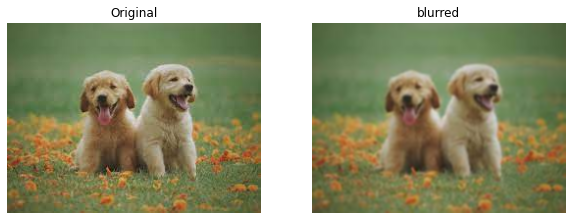

In [145]:
# Load the image
image = cv2.imread("data/2dogs.jpeg")


# define a kernel, larger the kernel size, more will be the blurring
kernel = (5, 5)

# open the image
blurred = cv2.GaussianBlur(image, kernel, 0)

# display both rotated images
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(image[:, :, ::-1]), plt.axis('off'), plt.title("Original")
plt.subplot(1, 2, 2), plt.imshow(blurred[:, :, ::-1]), plt.axis('off'), plt.title("blurred")

